# Otimizadores: (adam, sgd, adgrad, rmsprop, momentum)

In [1]:
#importando as bibliotecas
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
# Definindo a arquitetura da rede neural
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [3]:
# Função de treinamento
def train(model, train_loader, optimizer, criterion, device):
    model.train()
    total_loss = 0.0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

# Função de avaliação
def evaluate(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            total_loss += loss.item()
    return total_loss / len(data_loader)

In [4]:
# Função para treinar o modelo com um otimizador específico
def run_training(optimizer_name):
    # Hiperparâmetros
    batch_size = 64
    learning_rate = 0.001
    epochs = 15

    # Dataset e DataLoader
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
    valid_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)

    # Defina o tamanho do conjunto de validação
    validation_size = 0.2  # 20% dos dados serão usados para validação

    # Obtenha o número total de exemplos no conjunto de treinamento
    total_size = len(train_dataset)

    # Calcule o tamanho do conjunto de validação com base na porcentagem
    validation_size = int(validation_size * total_size)

    # Calcule o tamanho do conjunto de treinamento
    train_size = total_size - validation_size

    # Use random_split para dividir aleatoriamente o conjunto de treinamento
    train_dataset, valid_dataset = random_split(train_dataset, [train_size, validation_size])

    # Defina o DataLoader para o conjunto de treinamento e validação
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

    # Modelo, otimizador e função de perda
    model = SimpleNN()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = None

    if optimizer_name == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer_name == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    elif optimizer_name == 'momentum':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    elif optimizer_name == 'rmsprop':
        optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)
    elif optimizer_name == 'adagrad':
        optimizer = optim.Adagrad(model.parameters(), lr=learning_rate)

    criterion = nn.CrossEntropyLoss()

    # Treinamento e avaliação
    train_losses = []
    valid_losses = []

    for epoch in range(epochs):
        train_loss = train(model, train_loader, optimizer, criterion, device)
        valid_loss = evaluate(model, valid_loader, criterion, device)

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

        print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}')

    # Plotando os resultados
    plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
    plt.plot(range(1, epochs + 1), valid_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss - Optimizer: {optimizer_name}')
    plt.legend()
    plt.show()

100%|██████████| 9912422/9912422 [00:00<00:00, 155950828.95it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 88484801.92it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 142745802.73it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 1541803.88it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1/15, Train Loss: 0.4170, Valid Loss: 0.2653
Epoch 2/15, Train Loss: 0.2264, Valid Loss: 0.2060
Epoch 3/15, Train Loss: 0.1621, Valid Loss: 0.1495
Epoch 4/15, Train Loss: 0.1323, Valid Loss: 0.1303
Epoch 5/15, Train Loss: 0.1098, Valid Loss: 0.1524
Epoch 6/15, Train Loss: 0.0970, Valid Loss: 0.1150
Epoch 7/15, Train Loss: 0.0847, Valid Loss: 0.1052
Epoch 8/15, Train Loss: 0.0760, Valid Loss: 0.1032
Epoch 9/15, Train Loss: 0.0689, Valid Loss: 0.1156
Epoch 10/15, Train Loss: 0.0636, Valid Loss: 0.1353
Epoch 11/15, Train Loss: 0.0585, Valid Loss: 0.0971
Epoch 12/15, Train Loss: 0.0504, Valid Loss: 0.1050
Epoch 13/15, Train Loss: 0.0477, Valid Loss: 0.1088
Epoch 14/15, Train Loss: 0.0431, Valid Loss: 0.1101
Epoch 15/15, Train Loss: 0.0421, Valid Loss: 0.1031


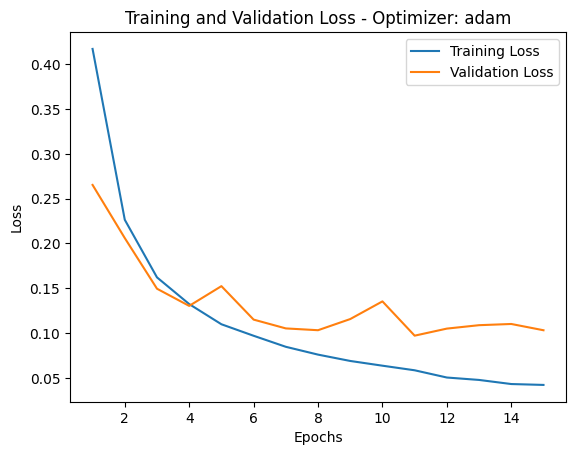

Epoch 1/15, Train Loss: 1.9427, Valid Loss: 1.6086
Epoch 2/15, Train Loss: 1.3236, Valid Loss: 1.0940
Epoch 3/15, Train Loss: 0.9372, Valid Loss: 0.8275
Epoch 4/15, Train Loss: 0.7414, Valid Loss: 0.6871
Epoch 5/15, Train Loss: 0.6326, Valid Loss: 0.6033
Epoch 6/15, Train Loss: 0.5645, Valid Loss: 0.5480
Epoch 7/15, Train Loss: 0.5183, Valid Loss: 0.5107
Epoch 8/15, Train Loss: 0.4847, Valid Loss: 0.4819
Epoch 9/15, Train Loss: 0.4594, Valid Loss: 0.4594
Epoch 10/15, Train Loss: 0.4395, Valid Loss: 0.4426
Epoch 11/15, Train Loss: 0.4235, Valid Loss: 0.4285
Epoch 12/15, Train Loss: 0.4104, Valid Loss: 0.4156
Epoch 13/15, Train Loss: 0.3991, Valid Loss: 0.4066
Epoch 14/15, Train Loss: 0.3895, Valid Loss: 0.3963
Epoch 15/15, Train Loss: 0.3811, Valid Loss: 0.3897


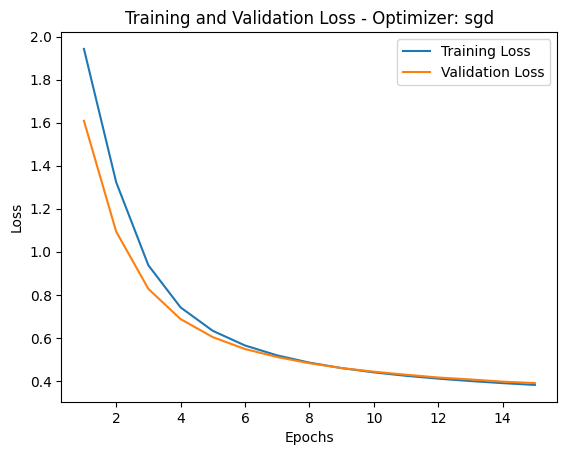

Epoch 1/15, Train Loss: 0.8878, Valid Loss: 0.4385
Epoch 2/15, Train Loss: 0.3929, Valid Loss: 0.3505
Epoch 3/15, Train Loss: 0.3386, Valid Loss: 0.3202
Epoch 4/15, Train Loss: 0.3108, Valid Loss: 0.2944
Epoch 5/15, Train Loss: 0.2900, Valid Loss: 0.2808
Epoch 6/15, Train Loss: 0.2735, Valid Loss: 0.2669
Epoch 7/15, Train Loss: 0.2584, Valid Loss: 0.2503
Epoch 8/15, Train Loss: 0.2439, Valid Loss: 0.2385
Epoch 9/15, Train Loss: 0.2308, Valid Loss: 0.2284
Epoch 10/15, Train Loss: 0.2194, Valid Loss: 0.2180
Epoch 11/15, Train Loss: 0.2084, Valid Loss: 0.2091
Epoch 12/15, Train Loss: 0.1979, Valid Loss: 0.2005
Epoch 13/15, Train Loss: 0.1892, Valid Loss: 0.1935
Epoch 14/15, Train Loss: 0.1806, Valid Loss: 0.1836
Epoch 15/15, Train Loss: 0.1728, Valid Loss: 0.1763


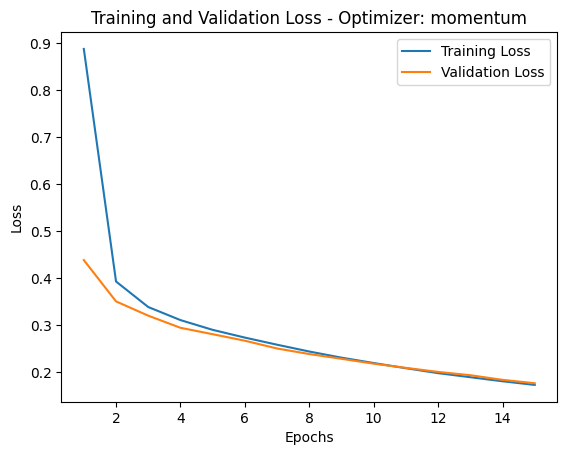

Epoch 1/15, Train Loss: 0.4290, Valid Loss: 0.3012
Epoch 2/15, Train Loss: 0.2296, Valid Loss: 0.2019
Epoch 3/15, Train Loss: 0.1688, Valid Loss: 0.1681
Epoch 4/15, Train Loss: 0.1361, Valid Loss: 0.1543
Epoch 5/15, Train Loss: 0.1151, Valid Loss: 0.1203
Epoch 6/15, Train Loss: 0.0996, Valid Loss: 0.1229
Epoch 7/15, Train Loss: 0.0887, Valid Loss: 0.1079
Epoch 8/15, Train Loss: 0.0809, Valid Loss: 0.1369
Epoch 9/15, Train Loss: 0.0729, Valid Loss: 0.1063
Epoch 10/15, Train Loss: 0.0677, Valid Loss: 0.1020
Epoch 11/15, Train Loss: 0.0607, Valid Loss: 0.1228
Epoch 12/15, Train Loss: 0.0586, Valid Loss: 0.1144
Epoch 13/15, Train Loss: 0.0545, Valid Loss: 0.1152
Epoch 14/15, Train Loss: 0.0496, Valid Loss: 0.1008
Epoch 15/15, Train Loss: 0.0468, Valid Loss: 0.1428


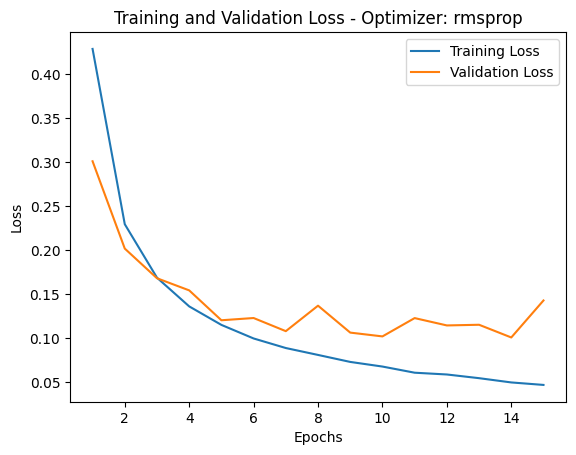

Epoch 1/15, Train Loss: 0.7412, Valid Loss: 0.4986
Epoch 2/15, Train Loss: 0.4578, Valid Loss: 0.4207
Epoch 3/15, Train Loss: 0.4050, Valid Loss: 0.3873
Epoch 4/15, Train Loss: 0.3781, Valid Loss: 0.3669
Epoch 5/15, Train Loss: 0.3609, Valid Loss: 0.3555
Epoch 6/15, Train Loss: 0.3486, Valid Loss: 0.3428
Epoch 7/15, Train Loss: 0.3388, Valid Loss: 0.3355
Epoch 8/15, Train Loss: 0.3307, Valid Loss: 0.3282
Epoch 9/15, Train Loss: 0.3241, Valid Loss: 0.3233
Epoch 10/15, Train Loss: 0.3183, Valid Loss: 0.3180
Epoch 11/15, Train Loss: 0.3133, Valid Loss: 0.3134
Epoch 12/15, Train Loss: 0.3086, Valid Loss: 0.3094
Epoch 13/15, Train Loss: 0.3045, Valid Loss: 0.3061
Epoch 14/15, Train Loss: 0.3007, Valid Loss: 0.3028
Epoch 15/15, Train Loss: 0.2972, Valid Loss: 0.3002


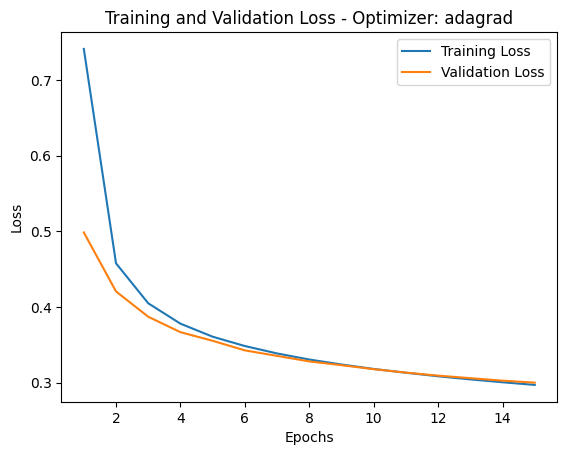

In [5]:
# Executando o treinamento com diferentes otimizadores
optimizers = ['adam', 'sgd', 'momentum', 'rmsprop', 'adagrad']

for optimizer in optimizers:
    run_training(optimizer)